In [1]:
# use all the samples as a batch to train, then iteration on batch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create mock up data
# count of samples
m = 100
X = np.random.random(m)

In [3]:
# create some offset as noise to simulate real data
noise = np.random.normal(0,0.1,X.shape)

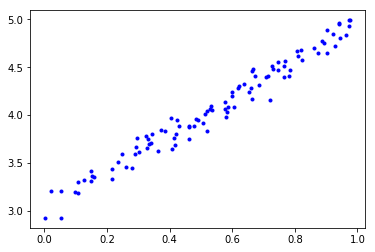

In [4]:
W = 2
B = 3
Y = X * W + B + noise
plt.plot(X, Y, "b.")
plt.show()

In [5]:
# 由于X是一组数据（100个），所以它是一个矢量，或者理解为一维数组。
# w和b都是一个标量，Z的计算结果也是一个矢量，尺寸和X一样。
def forward_calculation(w,b,X):
    Z = w * X + b
    return Z

In [6]:
# 由于是m个训练样本批量训练，所以结果要除以m，下同
# 注意X,Y,Z都是数组
def loss_calculation(Z,Y,m):
    loss = (Z-Y)**2    # cannot use (Z-Y)^2
    cost = loss.sum()/m/2
    return cost

def dJw(Z,Y,X,m):
    q = (Z-Y)*X
    dw = sum(q)/m
    return dw

def dJb(Z,Y,m):
    q = Z - Y
    db = sum(q)/m
    return db

In [7]:
# 权重更新，此处 w,b 是标量
def update_weights(w, b, dw, db, eta):
    w = w - eta*dw
    b = b - eta*db
    return w,b

In [8]:
# initialize_data
# step for each iteration
eta = 0.1
# set w,b=0, you can set to others values to have a try
w = 0
b = 0

In [9]:
# condition 1 to stop iteration: when Q - prevQ < error
error = 1e-10
prevQ = 10
# condition 2 to stop iteration
max_iteration = 10000
# counter of iteration
iteration = 0

In [10]:
# condition 2 to stop
while iteration < max_iteration:
    # using current w,b to calculate Z
    Z = forward_calculation(w,b,X)
    # compare Z and Y
    Q = loss_calculation(Z, Y, m)
    # get gradient value
    dW = dJw(Z, Y, X, m)
    dB = dJb(Z, Y, m)
    # update w and b
    w, b = update_weights(w, b, dW, dB, eta)
    print(iteration,w,b)
    iteration += 1
    # condition 1 to stop
    if abs(Q - prevQ) < error:
       break
    prevQ = Q

0 0.23141205355583538 0.40637473390655715
1 0.4327501523245373 0.7596882912891021
2 0.607936047475713 1.0668613551633357
3 0.7603800091617013 1.3339119951505753
4 0.8930475350559505 1.5660733884426499
5 1.0085173586074312 1.7678961873223837
6 1.109031891722529 1.9433375356719005
7 1.1965410885941272 2.095838475739073
8 1.2727405887072967 2.2283912593318838
9 1.3391048851447953 2.343597880128887
10 1.3969161670044463 2.443720972068403
11 1.4472894001208692 2.5307280694503618
12 1.4911941367007315 2.6063300945318053
13 1.5294734804942967 2.672014825479863
14 1.5628605784848886 2.729075999355753
15 1.591992961693615 2.7786386194193056
16 1.6174250156227772 2.821680961795422
17 1.6396388242748765 2.8590537119794366
18 1.6590535998693043 2.8914966055145155
19 1.676033882713339 2.9196528983528367
20 1.6908966716268095 2.94408194995828
21 1.703917624400125 2.965270165291306
22 1.7153364495741004 2.9836405097144585
23 1.7253615950112833 2.999560782941534
24 1.7341743249728874 3.013350813878848

645 1.9254258495787901 3.0302147680960605
646 1.9254542915449637 3.0301986509841337
647 1.9254825839318481 3.030182618633792
648 1.9255107275260963 3.0301666705992663
649 1.9255387231102246 3.03015080643713
650 1.9255665714626335 3.0301350257062896
651 1.9255942733576303 3.0301193279679715
652 1.92562182956545 3.030103712785709
653 1.9256492408522763 3.030088179725331
654 1.9256765079802645 3.0300727283549502
655 1.9257036317075606 3.03005735824495
656 1.9257306127883242 3.030042068967974
657 1.9257574519727485 3.0300268600989124
658 1.9257841500070811 3.0300117312148918
659 1.9258107076336453 3.029996681895262
660 1.92583712559086 3.029981711721586
661 1.9258634046132612 3.0299668202776266
662 1.9258895454315217 3.029952007149336
663 1.9259155487724715 3.029937271924844
664 1.9259414153591186 3.029922614194446
665 1.9259671459106678 3.029908033550593
666 1.9259927411425422 3.029893529587878
667 1.926018201766402 3.0298791019030276
668 1.9260435284901651 3.0298647500948883
669 1.926068

In [11]:
print(Q,prevQ)
print(w,b)

0.003986142153603739 0.003986142253316502
1.9303163979298807 3.027443457748627


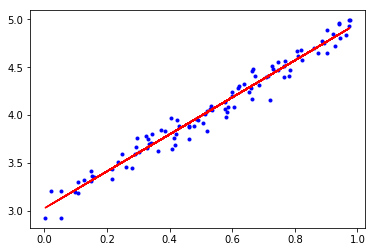

In [12]:
Y_ = X * w + b
plt.plot(X, Y, "b.")
plt.plot(X, Y_, "r")
plt.show()